# Lorenz attractor:

Solve the Lorenz equations numerically using Python.

$$
\begin{aligned}
\dot{x} &= \sigma (y - x), \\
\dot{y} &= r x - y - x z, \\
\dot{z} &= x y - b z.
\end{aligned}
$$


In [1]:
# Importing libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pyvista as pv

### Define ODE:

In [2]:
# ODE system
def system(t, state):
    """
    Input State -> [x, y, z]
    Outputs -> [dxdt, dydt, dzdt]
    """
    x, y, z = state
    
    # Slopes
    dxdt = s*(y - x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    
    return [dxdt, dydt, dzdt]

### Run parameters

In [3]:
# Fixed parameters: Lorenz simulation
s = 10.
b = 8./3.
r = 28.

### Critical value for Hopf bifurcation:

In [4]:
# Calculate critical r for Hoptf bifurcation
r_h = s*(s + b + 3.)/(s - b - 1.)

print(r_h)

24.736842105263154


### Time domain and ICs

In [5]:
# Time limits
t_lims = [0., 40.]

# Time axis
t_axis = np.linspace(t_lims[0], t_lims[1], 10000)

In [6]:
# Initial conditions
ics = [[0., 1., 0.], [0., 1.01, 0.]] # Expand to see other trajectories
#ics = [[5., 5., 5.]] # Expand to see other trajectories

### 3D representation of the trajectory/ies

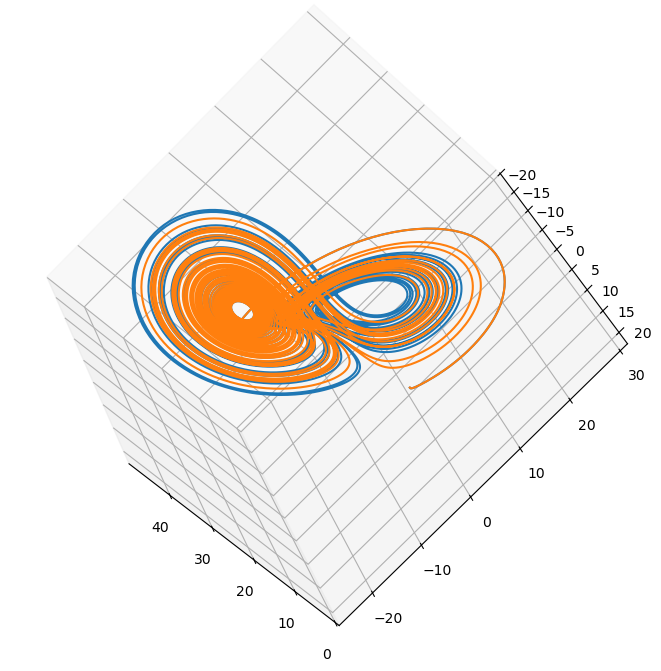

In [7]:
# Figure environment

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection ='3d')

# Integrate and plot trajectories
for x0, y0, z0 in ics:
    
    # Integrate and plot trajectories
    sol = solve_ivp(system, t_lims, [x0, y0, z0], t_eval=t_axis, method='RK45')
    #print(sol)
    ax.plot(sol.y[0], sol.y[1], sol.y[2])

    ax.view_init(elev=30, azim=10, roll=50)

    #ax.plot(sol.t, sol.y[1])

plt.show()

### Evolution of the Y coordinate:

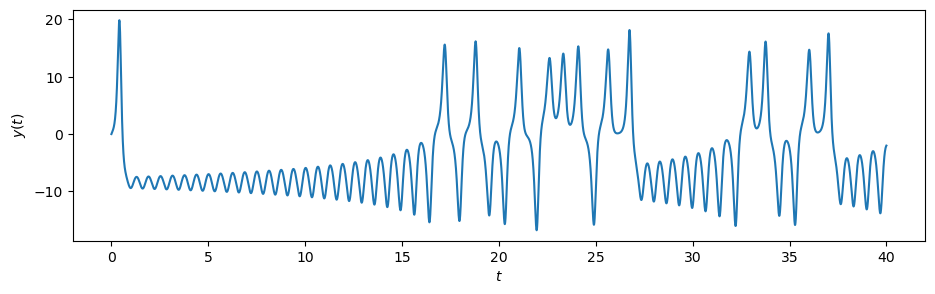

In [8]:
# Figure environment.
plt.figure(figsize=(11, 3))

plt.plot(sol.t, sol.y[0])

plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")

plt.show()

### Exponential Divergence of Nearby Trajectories: Chaos

In [9]:
# Initial conditions
delta_0 = 1.e-1

ics = [[0., 1., 0.], [0., 1.+delta_0, 0.]]


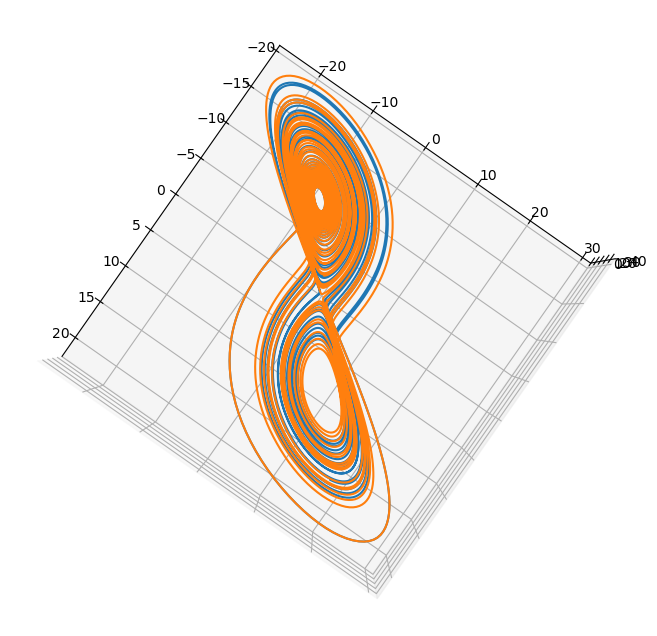

In [10]:
# Figure environment
slns = []

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection ='3d')

# Integrate and plot trajectories
for x0, y0, z0 in ics:
    
    # Integrate and plot trajectories
    sol = solve_ivp(system, t_lims, [x0, y0, z0], t_eval=t_axis, method='RK45')
    #print(sol)

    slns.append(sol)
    
    ax.plot(sol.y[0], sol.y[1], sol.y[2])

    ax.view_init(elev=90, azim=45, roll=10)

    #ax.plot(sol.t, sol.y[1])

plt.show()

### y vs. t

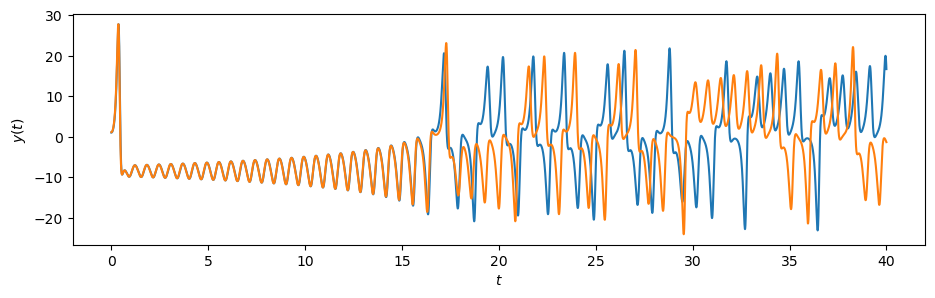

In [11]:
# Figure environment.
plt.figure(figsize=(11, 3))

plt.plot(slns[0].t, slns[0].y[1])
plt.plot(slns[1].t, slns[1].y[1])

plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")

plt.show()

In [12]:
# Calculate delta(t)

delta_t = np.log(abs(slns[1].y[1] - slns[0].y[1]))


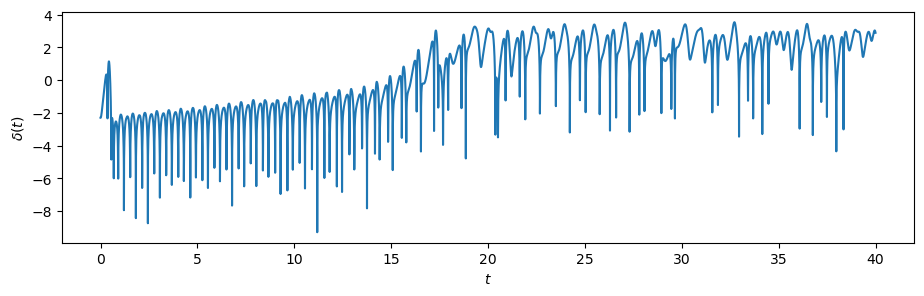

In [13]:
# Figure environment.
plt.figure(figsize=(11, 3))

plt.plot(slns[0].t, delta_t)

plt.xlabel(r"$t$")
plt.ylabel(r"$\delta(t)$")

plt.show()

### Export data as points with coordinates

You can visualise the outfile using:

- Paraview: https://www.paraview.org/download

- VisIt: http://visit-dav.github.io/visit-website/releases-as-tables

In [14]:
points = np.stack((sol.y[0], sol.y[1], sol.y[2]), axis=1)

cloud = pv.PolyData(points)

cloud['time'] = sol.t

output_file = 'data_export.vtp'

cloud.save(output_file)